## Gradient Boosting:

Gradient Boosting is another ensemble method that progressively minimizes bias by assembling a series of weak learners, often decision trees, into a robust model. It starts with a basic prediction and calculates the residuals - the differences between the predicted and actual values. Subsequently, a new tree is fit on these residuals, predicting the errors of the previous tree and thereby reducing the model's bias.

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTENC
# Read data
new_dataset_efmjieh1 = pd.read_csv("imputedfi.csv")
# Specify the variables to scale
numerical_variables = ["efalimo", "efalip", "efcapgn", "efccar", "efchtxb", 
"efcpqpp", "efearng", "efgi", "efgstxc", "efgtr", "efinva", "efoasgi", "efogovtr", "efothinc", "efpen", "efpenrec", "efphpr", "efpvtxc", "efrppc", "efrspwi", "efsapis", "efsemp", 
"efsize", "efuiben", "efwkrcp", "efagofmp", "efagyfmp", "hlev2g"]

# Specify categorical variables
categorical_variables = ["eftyp", "prov", "dwltyp", "dwtenr", "marstp", "efmjsi","sex","immst","uszgap"]
new_dataset_efmjieh1.loc[new_dataset_efmjieh1['fschhldm'] >= 1, 'fschhldm'] = 1

In [2]:
# Create the target and features
y = new_dataset_efmjieh1['fschhldm']
X = new_dataset_efmjieh1.drop(columns=['fschhldm'])

# Numerical features to scale
cols_to_scale = numerical_variables

# Define pipeline for scaling numerical features and one-hot encoding categorical features
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, cols_to_scale),
        ('cat', categorical_transformer, categorical_variables)
    ]
)

# Apply preprocessing
X_preprocessed = preprocessor.fit_transform(X)

# Create a mask for SMOTENC after one-hot encoding
# True for categorical features and False for numerical features
categorical_features_mask = np.concatenate(
    [np.full(len(cols_to_scale), False),
     np.full(preprocessor.transformers_[1][1].categories_[0].shape[0], True)]
)

# Apply SMOTENC
smote_nc = SMOTENC(categorical_features=categorical_features_mask, random_state=42, sampling_strategy='minority')
X_resampled, y_resampled = smote_nc.fit_resample(X_preprocessed, y)

# Encode the labels
le = LabelEncoder()
y_resampled_ready = le.fit_transform(y_resampled)

# Split the resampled data into training and testing sets
X_train, X_test, y_train_ready, y_test_ready = train_test_split(X_resampled, y_resampled_ready, random_state=42, stratify=y_resampled_ready)


In [3]:
# Define and fit the classifier
clf = RandomForestClassifier(random_state=42, n_jobs=-1)
clf.fit(X_train, y_train_ready)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [4]:
num_trees = clf.n_estimators
print(f'The number of trees in the random forest model is {num_trees}')


The number of trees in the random forest model is 100


In [5]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the model
gbc = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fit the model
gbc.fit(X_train, y_train_ready)

# You can use the model to make predictions using gbc.predict()


GradientBoostingClassifier(random_state=42)

              precision    recall  f1-score   support

           0       0.85      0.91      0.88     26545
           1       0.90      0.85      0.87     26546

    accuracy                           0.88     53091
   macro avg       0.88      0.88      0.88     53091
weighted avg       0.88      0.88      0.88     53091

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      8849
           1       0.90      0.84      0.87      8848

    accuracy                           0.87     17697
   macro avg       0.88      0.87      0.87     17697
weighted avg       0.88      0.87      0.87     17697



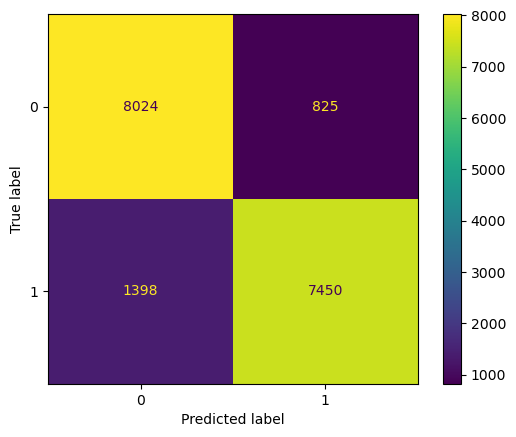

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# Predict the labels for train and test set
y_hat_train_gbc = gbc.predict(X_train)
y_hat_test_gbc = gbc.predict(X_test)

# Print classification reports
print(classification_report(y_train_ready, y_hat_train_gbc))
print(classification_report(y_test_ready, y_hat_test_gbc))

# Plot confusion matrix
cm_gbc = confusion_matrix(y_test_ready, y_hat_test_gbc)
disp_gbc = ConfusionMatrixDisplay(confusion_matrix=cm_gbc)
disp_gbc.plot() 
plt.show()


In [7]:
from sklearn.metrics import accuracy_score, roc_auc_score

# Predict the labels for train and test set
y_hat_train_gbc = gbc.predict(X_train)
y_hat_test_gbc = gbc.predict(X_test)

# Compute training and test accuracy
train_acc_gbc = accuracy_score(y_train_ready, y_hat_train_gbc)
test_acc_gbc = accuracy_score(y_test_ready, y_hat_test_gbc)

print("Training Accuracy: {:.2f}%".format(train_acc_gbc * 100))
print("Test Accuracy: {:.2f}%".format(test_acc_gbc * 100))

# Compute probabilities
y_train_proba_gbc = gbc.predict_proba(X_train)[:, 1]
y_test_proba_gbc = gbc.predict_proba(X_test)[:, 1]

# Compute ROC AUC
roc_auc_train_gbc = roc_auc_score(y_train_ready, y_train_proba_gbc)
roc_auc_test_gbc = roc_auc_score(y_test_ready, y_test_proba_gbc)

print("Training ROC AUC: {:.2f}".format(roc_auc_train_gbc))
print("Test ROC AUC: {:.2f}".format(roc_auc_test_gbc))


Training Accuracy: 87.65%
Test Accuracy: 87.44%
Training ROC AUC: 0.95
Test ROC AUC: 0.94


### Test Scores Over Iterations for Different Learning Rates

The first plot focuses on the loss function's output to measure model performance, providing insights into how well the model minimizes its defined loss over iterations.

/Users/klopfer/anaconda3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `loss_` was deprecated in version 1.1 and will be removed in 1.3.
  warnings.warn(msg, category=FutureWarning)
/Users/klopfer/anaconda3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `loss_` was deprecated in version 1.1 and will be removed in 1.3.
  warnings.warn(msg, category=FutureWarning)


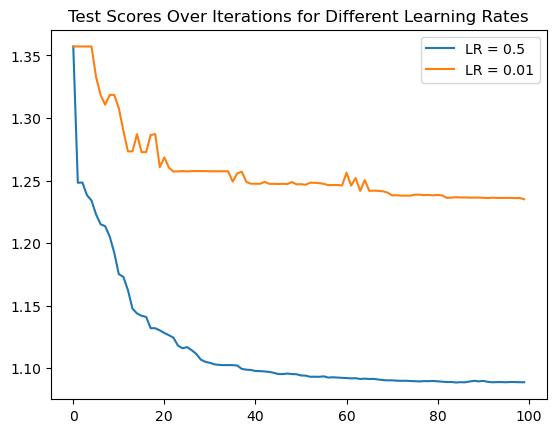

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Instantiate two models with different learning rates
gbc_05 = GradientBoostingClassifier(learning_rate=0.5, n_estimators=100, random_state=0)
gbc_01 = GradientBoostingClassifier(learning_rate=0.01, n_estimators=100, random_state=0)

# Fit models
gbc_05.fit(X_train, y_train_ready)
gbc_01.fit(X_train, y_train_ready)

# Compute scores for each model at each iteration
test_score_05 = np.zeros((gbc_05.n_estimators,), dtype=np.float64)
for i, y_pred in enumerate(gbc_05.staged_predict(X_test)):
    test_score_05[i] = gbc_05.loss_(y_test_ready, y_pred)

test_score_01 = np.zeros((gbc_01.n_estimators,), dtype=np.float64)
for i, y_pred in enumerate(gbc_01.staged_predict(X_test)):
    test_score_01[i] = gbc_01.loss_(y_test_ready, y_pred)

# Plot scores over iterations
plt.plot(test_score_05, label='LR = 0.5')
plt.plot(test_score_01, label='LR = 0.01')
plt.legend()
plt.title('Test Scores Over Iterations for Different Learning Rates')
plt.show()


A higher learning rate (0.5) leads to faster convergence and better performance on the test set compared to a lower learning rate (0.01). However, it's important to note that excessively high learning rates can lead to overfitting, where the model learns the noise in the training data. In this case, the learning rate of 0.5 provides a good balance between convergence speed and generalization performance.

### Test Errors Over Iterations for Different Learning Rates
The second plot uses accuracy to derive the test error, offering a straightforward interpretation where a lower error directly correlates to higher accuracy.

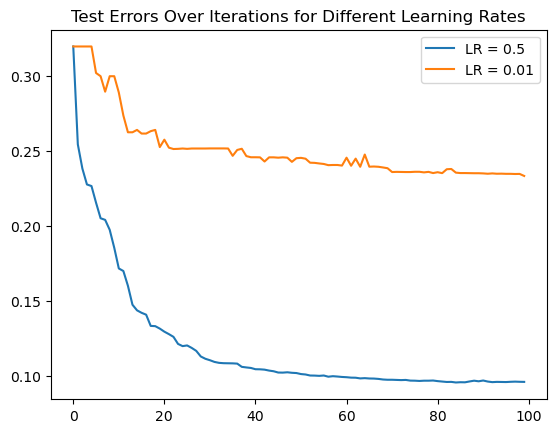

In [9]:
from sklearn.metrics import accuracy_score

# Compute scores for each model at each iteration
test_score_05 = np.zeros((gbc_05.n_estimators,), dtype=np.float64)
for i, y_pred in enumerate(gbc_05.staged_predict(X_test)):
    test_score_05[i] = 1 - accuracy_score(y_test_ready, y_pred)

test_score_01 = np.zeros((gbc_01.n_estimators,), dtype=np.float64)
for i, y_pred in enumerate(gbc_01.staged_predict(X_test)):
    test_score_01[i] = 1 - accuracy_score(y_test_ready, y_pred)

# Plot scores over iterations
plt.plot(test_score_05, label='LR = 0.5')
plt.plot(test_score_01, label='LR = 0.01')
plt.legend()
plt.title('Test Errors Over Iterations for Different Learning Rates')
plt.show()


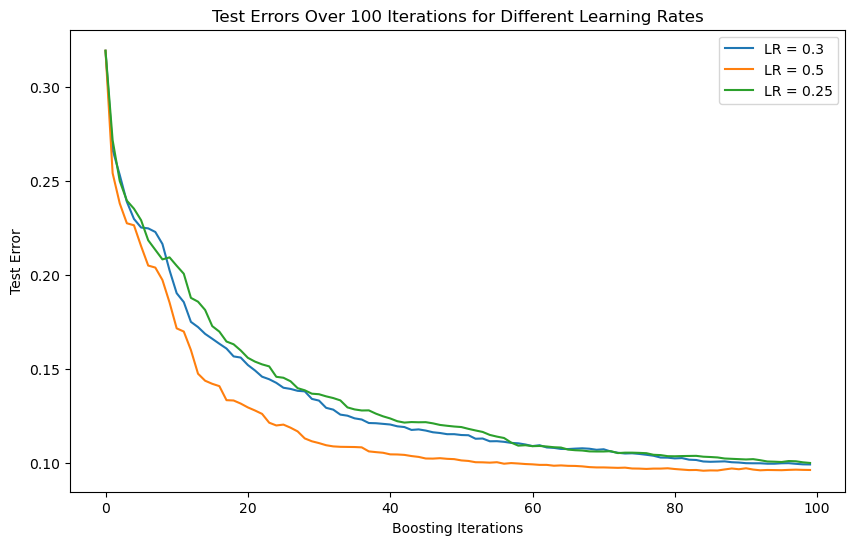

In [10]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Define models
gbc_03 = GradientBoostingClassifier(learning_rate=0.3, n_estimators=100, random_state=42)
gbc_05 = GradientBoostingClassifier(learning_rate=0.5, n_estimators=100, random_state=42)
gbc_025 = GradientBoostingClassifier(learning_rate=0.25, n_estimators=100, random_state=42)

# Fit models
gbc_03.fit(X_train, y_train_ready)
gbc_05.fit(X_train, y_train_ready)
gbc_025.fit(X_train, y_train_ready)

# Compute test error for each model at each iteration
test_score_03 = np.zeros((gbc_03.n_estimators,), dtype=np.float64)
for i, y_pred in enumerate(gbc_03.staged_predict(X_test)):
    test_score_03[i] = 1 - accuracy_score(y_test_ready, y_pred)

test_score_001 = np.zeros((gbc_05.n_estimators,), dtype=np.float64)
for i, y_pred in enumerate(gbc_05.staged_predict(X_test)):
    test_score_05[i] = 1 - accuracy_score(y_test_ready, y_pred)

test_score_025 = np.zeros((gbc_025.n_estimators,), dtype=np.float64)
for i, y_pred in enumerate(gbc_025.staged_predict(X_test)):
    test_score_025[i] = 1 - accuracy_score(y_test_ready, y_pred)

# Plot test error over iterations for different learning rates
plt.figure(figsize=(10,6))
plt.plot(test_score_03, label='LR = 0.3')
plt.plot(test_score_05, label='LR = 0.5')
plt.plot(test_score_025, label='LR = 0.25')
plt.xlabel('Boosting Iterations')
plt.ylabel('Test Error')
plt.title('Test Errors Over 100 Iterations for Different Learning Rates')
plt.legend()
plt.show()


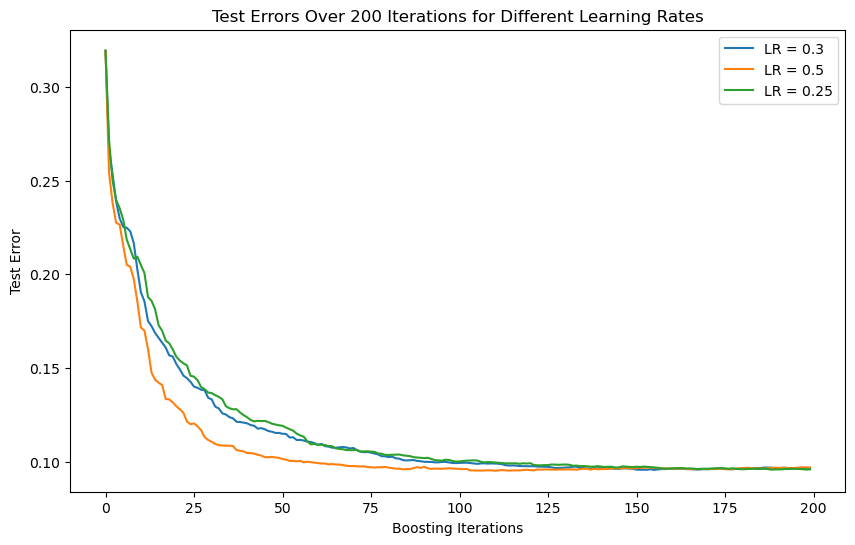

In [11]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Define models with 200 boosting iterations
gbc_03 = GradientBoostingClassifier(learning_rate=0.3, n_estimators=200, random_state=42)
gbc_05 = GradientBoostingClassifier(learning_rate=0.5, n_estimators=200, random_state=42)
gbc_025 = GradientBoostingClassifier(learning_rate=0.25, n_estimators=200, random_state=42)

# Fit models
gbc_03.fit(X_train, y_train_ready)
gbc_05.fit(X_train, y_train_ready)
gbc_025.fit(X_train, y_train_ready)

# Compute test error for each model at each iteration
test_score_03 = np.zeros((gbc_03.n_estimators,), dtype=np.float64)
for i, y_pred in enumerate(gbc_03.staged_predict(X_test)):
    test_score_03[i] = 1 - accuracy_score(y_test_ready, y_pred)

test_score_05 = np.zeros((gbc_05.n_estimators,), dtype=np.float64)
for i, y_pred in enumerate(gbc_05.staged_predict(X_test)):
    test_score_05[i] = 1 - accuracy_score(y_test_ready, y_pred)

test_score_025 = np.zeros((gbc_025.n_estimators,), dtype=np.float64)
for i, y_pred in enumerate(gbc_025.staged_predict(X_test)):
    test_score_025[i] = 1 - accuracy_score(y_test_ready, y_pred)

# Plot test error over iterations for different learning rates
plt.figure(figsize=(10,6))
plt.plot(test_score_03, label='LR = 0.3')
plt.plot(test_score_05, label='LR = 0.5')
plt.plot(test_score_025, label='LR = 0.25')
plt.xlabel('Boosting Iterations')
plt.ylabel('Test Error')
plt.title('Test Errors Over 200 Iterations for Different Learning Rates')
plt.legend()
plt.show()


A higher learning rate (0.5) leads to faster convergence and better performance on the test set compared to lower learning rates (0.3 and 0.25). However, it's important to balance the learning rate to avoid overfitting, where the model might learn the noise in the training data. In this case, the learning rate of 0.5 provides the best balance between convergence speed and generalization performance.